<a href="https://colab.research.google.com/github/rohailkhan/Marketing_analytics/blob/main/7_Identifying_Drivers_of_Outcomes_Linear_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7 **Amusement park data Analysis**
## **Using Linear Model**
Linear model will be used for this data analysis.
**Application of Linear Model**
Linear models relate to continuous scale outcome variables to predictors by finding a straight line that best fits the points

# **Steps for Linear Modelling**




**Step 1.   Data Quality checking :**


*   Its better to have **approximate Normal Distributions** .This can be checked by **Hist plots**
*   Also varaibles like count , Bool need to be changed.
*   **Excessive correlation** between variables should be avoided . If corr>0.8 or >0.9 exists,this shows that the items are **nearly identical**
*   standardize data to be on a uniform scale ie.

  X - Xmean/Xstd
*   List item
*   List item

**Step 2.   Linear Model fitting :**
Using statmodels ols library , Linear model object is created and one or more prdictors are checked using fit metod

**Step 4.  Model Summary (R-squared , F-statistics, Residuals etc) :**
We can find these from the model summary.

**R-squared**

Its a measure of how much variation in the dependent variable is captured by the model. In
this case, the R-squared is 0.407, indicating that about 41% of the variation in overall satisfaction is explained by variation
in satisfaction with rides. 

When a model includes only a single predictor, R-squared is equal to the square of the correlation
coefficient r between the predictor and the outcome:

**F-Satatistics**
This test shows whether the model predicts the data better than simply
taking the average of the outcome variable and using that as the single prediction for all the observations.

Or

In essence, this test
tells whether our model is better than a model that predicts overall satisfaction using no predictors at all. 

Note: this is the same test reported by the statsmodels.stats.anova.anova_lm() function  you could find the same value with anova_lm(m1). 

 In the present case, the F-statistic shows a p-value <<.05, so we reject the null hypothesis that
a model without predictors performs as well as model m1.

**Residuals**
The residuals (difference between actual and predicted values) should be symmetric around some point (like 0)
We can find the symmetry by plotting their **histogram** eg plt.hist(ml.resid)
 or taking the percentiles range as:

 np.percentile(ml.resid, q=range(0,120,25) 

**Step 3.  Checking Model fit (is the model reasonable?) :**

A linear model assumes that the relationship between predictors and an outcome is linear 

and that errors in fit are
symmetric with similar variability across their range (a property known as **homoskedasticity**)(already discussed that we can find this by plotting histograms of residuals , or finding percentile values of the residuals. 

Results may be misleading
when these assumptions do not match the data.To fix these we do some transformation with the predictors. Some common transformations are shown below in the table









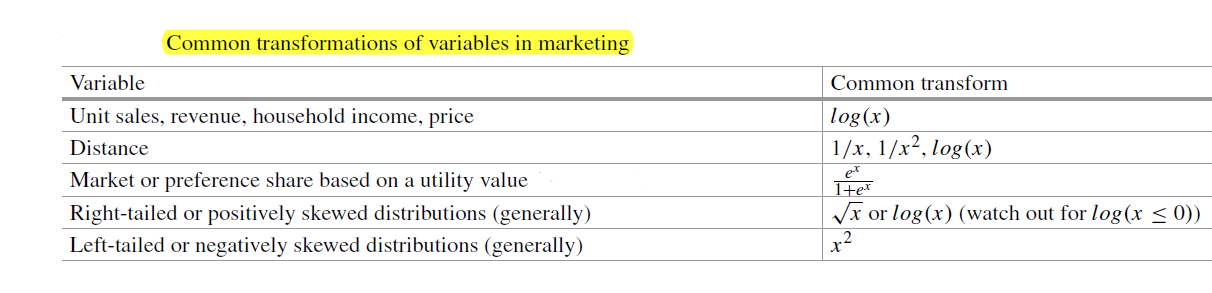

In [4]:
import PIL
PIL.Image.open('/content/drive/MyDrive/20210309_Files/7 vaiable transformations in linear models.PNG')

• The summary() function for ols objects provides output that analysts review most frequently, reporting model
coefficients along with their standard errors and p-values for hypothesis tests assessing whether the coefficients differ
from zero (Sect. 7.2.4)

ddddddddddddddddd

• Factor variables may be included in a model simply by converting the factor to dummy-coded 0/1 values using
pandas.get_dummies(). You must check the direction shown in the output to ensure you interpret these correctly
(Sect. 7.4).


• An interaction is a predictor that is the product of two other predictors, and thus assesses the degree to which the predictors
reinforce (or cancel) one another. You can model an interaction between x and y by including x:y in a model formula
(Sect. 7.5).


• Model building is the process of adding and removing predictors from a model to find a set of predictors that fits the data
well.We can compare the fit of different models using the R-squared value 

or, 

if models are nested (see Sect. 6.5) by using
the more formal ANOVA test (statsmodels.stats.anova.anova_lm()) (Sect. 7.3.1).
• We recommend to interpret coefficients in terms of their estimated ranges, such as confidence intervals in the case of
ols() (Sect. 7.2.4).

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
%config InlineBackend.figure_format = 'svg'
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 70)

### Load data

### Amusement Park Data

In [7]:
import pandas as pd
sat_df = pd.read_csv('http://bit.ly/PMR-ch7')
sat_df.head()

is_weekend  num_child   distance  rides  games   wait  clean  \
0        True          0   9.844503   82.0   64.0   82.0   88.0   
1       False          1   2.720221   85.0   83.0  100.0   90.0   
2       False          3   1.878189   88.0   81.0   80.0   91.0   
3       False          0  14.211682   73.0   52.0   68.0   74.0   
4       False          1   9.362776   78.0   93.0   56.0   82.0   

   overall  
0     68.0  
1    100.0  
2     95.0  
3     55.0  
4     63.0

In [8]:
import numpy as np
import pandas as pd
np.random.seed(8266)
n_resp = 500 # Number of survey responses

## Fitting linear models with lm()

In [9]:
sat_df.describe().round(2)

num_child  distance   rides   games    wait   clean  overall
count     500.00    500.00  500.00  500.00  500.00  500.00   500.00
mean        1.75     31.58   80.18   73.96   73.32   85.25    75.34
std         1.53     35.77    6.02    8.74   10.70    5.73    12.16
min         0.00      0.64   64.00   44.00   46.00   65.00    42.00
25%         0.00      9.07   76.00   68.00   66.00   82.00    67.00
50%         2.00     19.26   80.00   74.00   73.00   85.00    76.00
75%         3.00     39.01   84.00   80.00   80.00   89.00    85.00
max         5.00    233.30   99.00  100.00  100.00  100.00   100.00

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
import seaborn as sns
sns.set_context('paper')
import matplotlib.pyplot as plt
g = sns.PairGrid(sat_df.replace({False: 0, True: 1}),
                 height=1.2, aspect=1.0)
g.map_upper(sns.scatterplot, linewidths=1, edgecolor="w", s=10,
            alpha=0.5)
g.map_diag(plt.hist)
g.map_lower(sns.kdeplot)
plt.show()

Looking the diagonal historgrams we see that **Distance** is not normally distributed but **highly skewed** so we can remove this skew by taking its log and adding a new column to the data

In [12]:
sat_df['log_dist'] = sat_df.distance.apply(np.log)

Text(0, 0.5, 'Count')

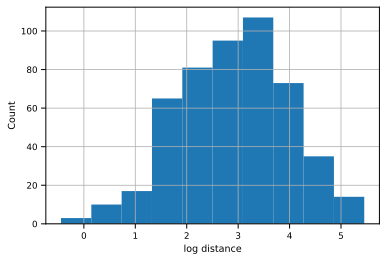

In [13]:
sat_df.log_dist.hist()
plt.xlabel('log distance')
plt.ylabel('Count')

In [14]:
sat_df.corr()

is_weekend  num_child  distance     rides     games  \
is_weekend    1.000000   0.035537  0.057859  0.057817 -0.022099   
num_child     0.035537   1.000000  0.009624 -0.027300  0.048249   
distance      0.057859   0.009624  1.000000  0.054943  0.037450   
rides         0.057817  -0.027300  0.054943  1.000000  0.530970   
games        -0.022099   0.048249  0.037450  0.530970  1.000000   
wait          0.027265   0.014658  0.013249  0.356009  0.290641   
clean         0.036172   0.016123  0.024323  0.806247  0.544000   
overall       0.012385   0.337012  0.153014  0.637674  0.502826   
log_dist      0.044948  -0.043294  0.827848  0.014385  0.048214   

                wait     clean   overall  log_dist  
is_weekend  0.027265  0.036172  0.012385  0.044948  
num_child   0.014658  0.016123  0.337012 -0.043294  
distance    0.013249  0.024323  0.153014  0.827848  
rides       0.356009  0.806247  0.637674  0.014385  
games       0.290641  0.544000  0.502826  0.048214  
wait        1.000000  0.427469  0.576697  0.003471  
clean       0.427469  1.000000  0.679433 -0.004446  
overall     0.576697  0.679433  1.000000  0.099192  
log_dist    0.003471 -0.004446  0.099192  1.000000

### Correlation plot
 Inspection of the item associations is always recommended before linear modeling,
in order to check for extremely high correlations between items **(such as r > 0.9)**. 

In the present data, rides and clean are highly related
**(r = 0.81)** but not so strongly that remediation is strictly required

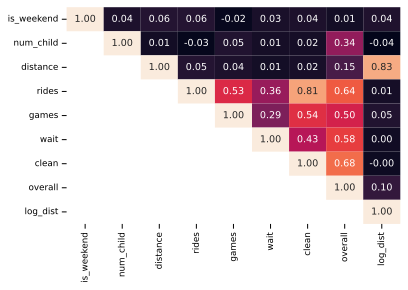

In [15]:
sat_df_corr = sat_df.corr()
sns.heatmap(sat_df_corr, annot=True, fmt=".2f",
            mask=np.tri(sat_df_corr.shape[0], k=-1, dtype=bool),
            cbar=False)

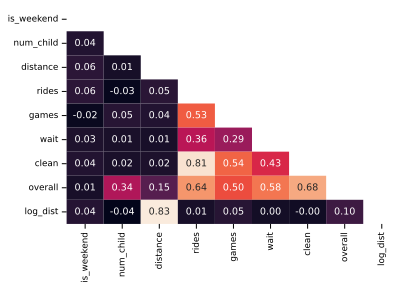

In [16]:
sat_df_corr = sat_df.corr()
sns.heatmap(sat_df_corr, annot=True, fmt=".2f",
            mask=~np.tri(sat_df_corr.shape[0], k=-1, dtype=bool),
            cbar=False)

### **Q-1 Find Over All Satisfaction vs rides**

Text(0, 0.5, 'Satisfaction overall')

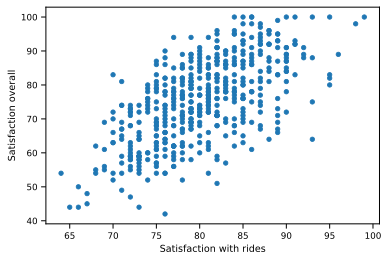

In [17]:
sat_df.plot(kind='scatter', x='rides', y='overall')
plt.xlabel('Satisfaction with rides')
plt.ylabel('Satisfaction overall')

### Linear model for **Over All Satisfaction vs rides**
Using single predictor

In [18]:
# using scikit learn 
from sklearn.linear_model import LinearRegression
X=np.array(sat_df['overall']).reshape(-1, 1)
Y=np.array(sat_df['rides']).reshape(-1, 1)
reg = LinearRegression().fit(X, Y)
reg.score(X, Y) , reg.coef_ , reg.intercept_

(0.4066280681606048, array([[0.3155351]]), array([56.40621657]))

In [19]:
# using OLS library from statmodels.formula.api
import statsmodels.formula.api as smf
OLS=smf.ols(formula='overall ~ rides', data=sat_df).fit()


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Linear Model Summary**

In [20]:
print(OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                overall   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     341.3
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           2.02e-58
Time:                        09:25:41   Log-Likelihood:                -1827.7
No. Observations:                 500   AIC:                             3659.
Df Residuals:                     498   BIC:                             3668.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -27.9869      5.609     -4.990      0.0

#### **1- R-squared**, a measure of how much variation in the dependent variable is captured by the model. 
In this case, the R-squared is **0.407**, indicating that about **41%** of the variation in overall satisfaction is explained by variation
in satisfaction with rides.

Note: When a model includes only a single predictor, R-squared is equal to the square of the correlation
coefficient r between the predictor and the outcome

#### **2- F-statistic**
In essence, this test
tells whether our model is better than a model that predicts (overall satisfaction) using no predictors at all.
OR

F-statistic shows whether the model predicts the data better than simply
taking the **average of the outcome variable** and using that as the **single prediction** for all the observations.

In the present case, the F-statistic shows a p-value <<.05, so we reject the null hypothesis that
a model without predictors performs as well as model m1.

#### **3 - The Linear Model predictions** 
The Linear Model formula is **Y = mX + C**
 For **overall-vs-rides** We have intercept C=-27.989
 Y = Over All ratings (prediction or outcome)
 
 X = Rides (feature)
 If X=95 , then a consumer will give 94.439 over all ratings because:
 
  Y= -27.9869 + 1.2887*95= 94.439

 We can show this using the predict method

In [21]:
OLS.predict({'rides' : [95]})

0    94.439017
dtype: float64

#### **4 - The Residuals**
The difference between the Actual and predicted values 

In [22]:
lm=OLS
lm.resid.min() , lm.resid.max() , lm.resid.mean()

(-27.953838097780633, 22.75746829230569, 9.464429240324535e-15)

The range is quite wide, ranging from −27.954 to 22.757, which means our predictions can be rather off for any given data
point (more than 27 points on the rating scale). 

The quartiles of the residuals suggest that they are fairly symmetric around
0, at least in the interquartile range:

In [25]:
np.percentile(OLS.resid, q=range(0,120,25))

array([-27.9538381 ,  -6.56470511,  -0.04165295,   7.18008107,
        22.75746829])

In [26]:
m1=OLS

Text(0, 0.5, 'Count')

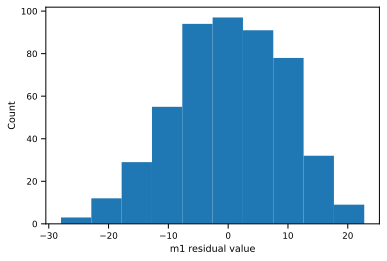

In [27]:
plt.hist(m1.resid)
plt.xlabel('m1 residual value')
plt.ylabel('Count')

In [28]:
# that is a good sign that the model is unbiased (although perhaps imprecise).
# We can also look at the standard deviation of the residuals
np.std(m1.resid)

9.360403552873873

### ols objects

In [29]:
m1 = smf.ols('overall ~ rides', data=sat_df).fit()

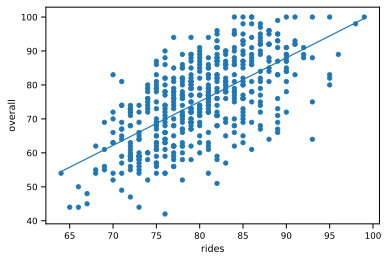

In [30]:
# This plot and the one below it are identical
sat_df.plot(kind='scatter', x='rides', y='overall')
plt.plot(sat_df.rides, m1.predict(sat_df.rides))

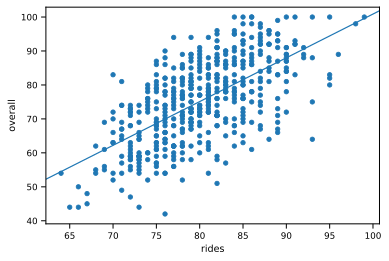

In [31]:
from statsmodels.graphics import regressionplots
sat_df.plot(kind='scatter', x='rides', y='overall')
ax = plt.gca()
_ = regressionplots.abline_plot(model_results=m1, ax=ax)

## 7.2.5 Checking Model Fit

In [33]:
np.random.seed(8266)
x = np.random.normal(size=500)
y = x**2 + np.random.normal(size=500)
toy_model = smf.ols('y ~ x', data={'x': x, 'y': y}).fit()
toy_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.999
Date:                Tue, 19 Oct 2021   Prob (F-statistic):              0.158
Time:                        09:52:41   Log-Likelihood:                -1028.1
No. Observations:                 500   AIC:                             2060.
Df Residuals:                     498   BIC:                             2069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1192      0.085     13.184      0.000       0.952       1.286
x             -0.1129      0.080     -1.414      0.158      -0.270       0.044
==============================================================================
Omnibus:                      201.006   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1017.482
Skew:                           1.711   Prob(JB):                    1.14e-221
Kurtosis:                       9.093   Cond. No.                         1.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'x vs y with fit line')

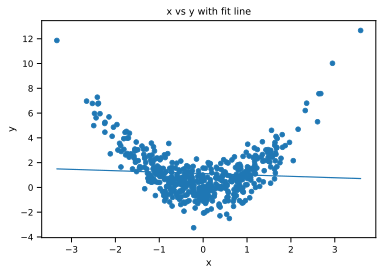

In [34]:
plt.scatter(x,y)
plt.plot(x, toy_model.predict({'x': x}))
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y with fit line')

Text(0.5, 1.0, 'Predicted y values vs Residuals')

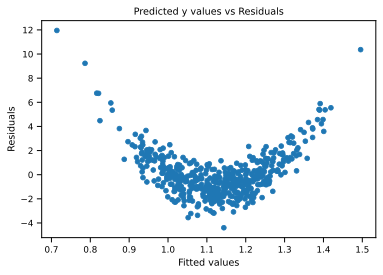

In [35]:
plt.scatter(x=toy_model.fittedvalues, y=toy_model.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Predicted y values vs Residuals')

In [36]:
from statsmodels.graphics import gofplots
def plot_gof_figures(model):
  '''Plot a multipanel figure of goodness of fit plots'''
  sns.residplot(model.fittedvalues, model.resid, lowess=True)
  plt.xlabel('Fitted values')
  plt.ylabel('Residuals')
  plt.title('Residuals vs Fitted')
  plt.show()

  _ = gofplots.qqplot(model.resid, fit=True, line='45')
  plt.title('Normal Q-Q')
  plt.show()

  plt.scatter(model.fittedvalues, np.abs(model.resid)**.5)
  plt.xlabel('Fitted values')
  plt.ylabel('Square root of the standardized residuals')
  plt.title('Scale-Location')
  plt.show()

  regressionplots.plot_leverage_resid2(model)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


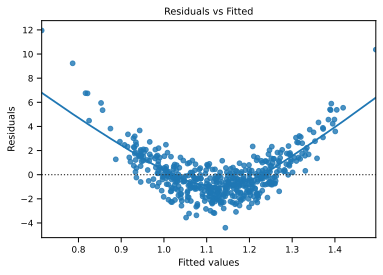

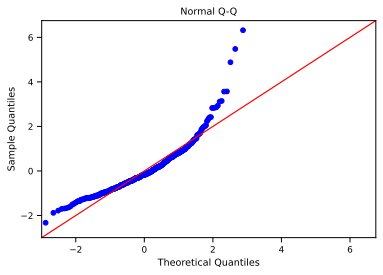

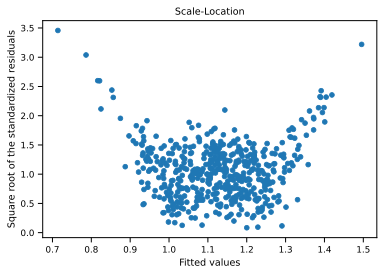

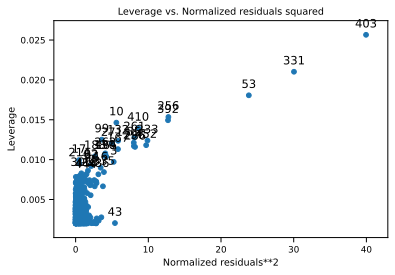

In [37]:
plot_gof_figures(toy_model)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


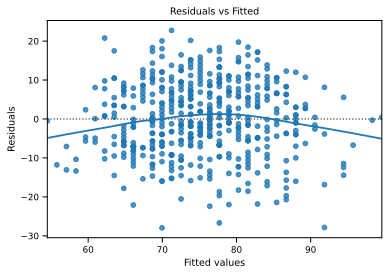

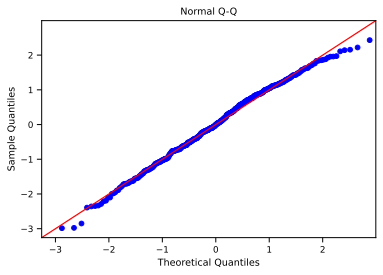

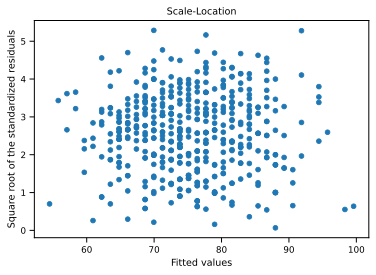

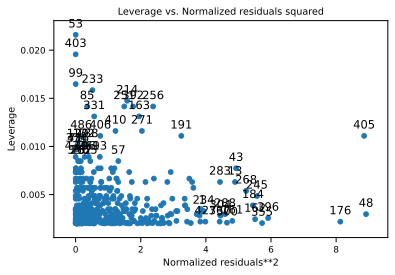

In [38]:
plot_gof_figures(m1)

In [39]:
sat_df.loc[[ 405, 48, 176]]

is_weekend  num_child   distance  rides  games  wait  clean  \
405        True          0  11.445116   93.0   77.0  75.0   89.0   
48        False          0   8.434066   76.0   61.0  48.0   73.0   
176        True          0  18.318936   82.0   61.0  74.0   84.0   

     overall  log_dist  
405     64.0  2.437563  
48      42.0  2.132279  
176     51.0  2.907935

## 7.3 Fitting Linear Models with Multiple Predictors

In [40]:
m2 = smf.ols('overall ~ rides + games + wait + clean',
             data=sat_df).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     181.9
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           9.91e-96
Time:                        09:53:18   Log-Likelihood:                -1732.2
No. Observations:                 500   AIC:                             3474.
Df Residuals:                     495   BIC:                             3495.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -53.6088      5.246    -10.219      0.000     -63.916     -43.302
rides          0.4256      0.099      4.279      0.000       0.230       0.621
games          0.1861      0.048      3.843      0.000       0.091       0.281
wait           0.3842      0.036     10.647      0.000       0.313       0.455
clean          0.6205      0.108      5.725      0.000       0.408       0.834
==============================================================================
Omnibus:                       12.515   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.113
Skew:                          -0.390   Prob(JB):                      0.00142
Kurtosis:                       2.854   Cond. No.                     2.37e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**The residual standard error is now 7.732, whereas it was 9.360 for the simpler model, meaning that the predictions are more
accurate. bold text**

In [41]:
np.std(m2.resid)

7.732470220113993

Text(0, 0.5, 'Count')

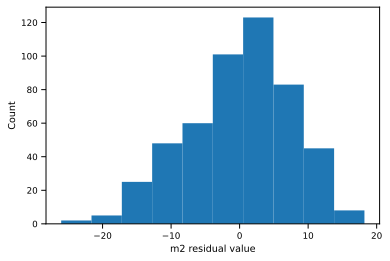

In [42]:
plt.hist(m2.resid)
plt.xlabel('m2 residual value')
plt.ylabel('Count')

In [43]:
np.percentile(m2.resid, q=range(0,101,25))

array([-26.0408112 ,  -4.89848961,   0.88100141,   5.56376647,
        18.2162639 ])

In [44]:
!pip install python_marketing_research
from python_marketing_research_functions import chapter6

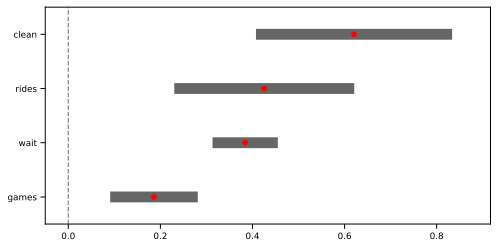

In [45]:
chapter6.plot_confidence_intervals(m2.params[1:],
                                   m2.conf_int().iloc[1:,:],
                                   zero_line=True)

### 7.3.1 Comparing Models

In [46]:
print(m1.rsquared)
print(m2.rsquared)

0.4066280681606046
0.5950752098970709


In [47]:
print(m1.rsquared_adj)
print(m2.rsquared_adj)

0.4054365582573126
0.5918030903810876


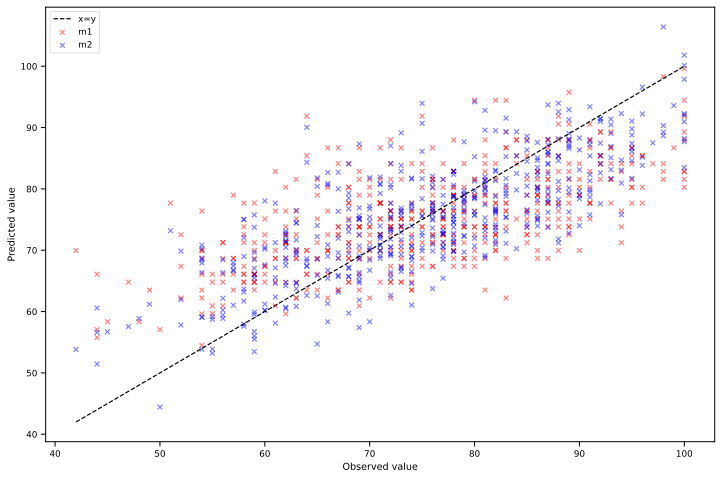

In [48]:
plt.figure(figsize=(12,8))
plt.scatter(sat_df.overall, m1.fittedvalues, c='r', marker='x',
            alpha=0.5, label='m1')
plt.scatter(sat_df.overall, m2.fittedvalues, c='b', marker='x',
            alpha=0.5, label='m2')
satisfaction_range = [sat_df.overall.min(), sat_df.overall.max()]

plt.plot(satisfaction_range, satisfaction_range, '--k', label = 'x=y')
plt.xlabel('Observed value')
plt.ylabel('Predicted value')
plt.legend()

In [49]:
from statsmodels.stats import anova as sms_anova
sms_anova.anova_lm(m1,m2)

df_resid           ssr  df_diff       ss_diff          F  \
0     498.0  43808.577336      0.0           NaN        NaN   
1     495.0  29895.547852      3.0  13913.029484  76.789021   

         Pr(>F)  
0           NaN  
1  8.500020e-41

### 7.3.2 Using a Model to Make Predictions

In [50]:
m2.params.Intercept + m2.params.rides*100 + m2.params.games*100\
  + m2.params.wait*100 + m2.params.clean*100

108.0238244944531

In [51]:
m2.params.Intercept + (m2.params[1:].sum() * 100)

108.0238244944531

In [52]:
m2.predict(sat_df.head(10))

0    79.303964
1    92.271882
2    86.113782
3    59.175321
4    69.286346
5    72.019136
6    79.708122
7    75.172110
8    75.774821
9    80.446600
dtype: float64

In [53]:
m2.fittedvalues[:10]

0    79.303964
1    92.271882
2    86.113782
3    59.175321
4    69.286346
5    72.019136
6    79.708122
7    75.172110
8    75.774821
9    80.446600
dtype: float64

In [54]:
m2.predict({'rides': 100,
            'games': 100,
            'wait': 100,
            'clean': 100})

0    108.023824
dtype: float64

### 7.3.3 Standardizing the Predictors

In [55]:
((sat_df.rides - sat_df.rides.mean())/sat_df.rides.std()).head(10)

0    0.302715
1    0.801147
2    1.299580
3   -1.192583
4   -0.361862
5    0.468859
6    0.136571
7   -0.361862
8   -0.029574
9   -0.528006
Name: rides, dtype: float64

In [56]:
sat_df.head()

is_weekend  num_child   distance  rides  games   wait  clean  \
0        True          0   9.844503   82.0   64.0   82.0   88.0   
1       False          1   2.720221   85.0   83.0  100.0   90.0   
2       False          3   1.878189   88.0   81.0   80.0   91.0   
3       False          0  14.211682   73.0   52.0   68.0   74.0   
4       False          1   9.362776   78.0   93.0   56.0   82.0   

   overall  log_dist  
0     68.0  2.286913  
1    100.0  1.000713  
2     95.0  0.630308  
3     55.0  2.654064  
4     63.0  2.236742

In [57]:
sat_df_scaled = sat_df.copy()
idx = ['clean', 'games', 'rides', 'wait', 'log_dist', 'overall']
sat_df_scaled[idx] = (sat_df[idx] - sat_df[idx].mean(axis=0))\
  /sat_df[idx].std(axis=0)

In [58]:
sat_df_scaled.head()

is_weekend  num_child   distance     rides     games      wait  \
0        True          0   9.844503  0.302715 -1.139289  0.811454   
1       False          1   2.720221  0.801147  1.034490  2.494194   
2       False          3   1.878189  1.299580  0.805671  0.624483   
3       False          0  14.211682 -1.192583 -2.512202 -0.497343   
4       False          1   9.362776 -0.361862  2.178584 -1.619169   

      clean   overall  log_dist  
0  0.480319 -0.603270 -0.598161  
1  0.829134  2.027508 -1.801954  
2  1.003542  1.616449 -2.148627  
3 -1.961389 -1.672024 -0.254534  
4 -0.566127 -1.014329 -0.645118

In [59]:
sat_df_scaled[idx].describe().round(2)

clean   games   rides    wait  log_dist  overall
count  500.00  500.00  500.00  500.00    500.00   500.00
mean     0.00    0.00    0.00    0.00     -0.00     0.00
std      1.00    1.00    1.00    1.00      1.00     1.00
min     -3.53   -3.43   -2.69   -2.55     -3.16    -2.74
25%     -0.57   -0.68   -0.69   -0.68     -0.68    -0.69
50%     -0.04    0.00   -0.03   -0.03      0.03     0.05
75%      0.65    0.69    0.64    0.62      0.69     0.79
max      2.57    2.98    3.13    2.49      2.36     2.03

## 7.4 Using Factors as Predictors

In [60]:
m3 = smf.ols('overall ~ rides + games + wait + clean + is_weekend'
             ' + log_dist + num_child', data=sat_df_scaled).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     176.3
Date:                Tue, 19 Oct 2021   Prob (F-statistic):          1.01e-129
Time:                        09:55:10   Log-Likelihood:                -395.18
No. Observations:                 500   AIC:                             806.4
Df Residuals:                     492   BIC:                             840.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.3516      0.042     -8.423      0.000      -0.434      -0.270
is_weekend[T.True]    -0.0724      0.049     -1.485      0.138      -0.168       0.023
rides                  0.2558      0.042      6.147      0.000       0.174       0.338
games                  0.0992      0.029      3.371      0.001       0.041       0.157
wait                   0.3363      0.027     12.591      0.000       0.284       0.389
clean                  0.2718      0.043      6.310      0.000       0.187       0.356
log_dist               0.1069      0.024      4.423      0.000       0.059       0.154
num_child              0.2190      0.016     13.864      0.000       0.188       0.250
==============================================================================
Omnibus:                        0.081   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.163
Skew:                          -0.017   Prob(JB):                        0.922
Kurtosis:                       2.918   Cond. No.                         5.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
dummy_vals = pd.get_dummies(sat_df_scaled.num_child, prefix='num_child')
dummy_vals.head()

num_child_0  num_child_1  num_child_2  num_child_3  num_child_4  \
0            1            0            0            0            0   
1            0            1            0            0            0   
2            0            0            0            1            0   
3            1            0            0            0            0   
4            0            1            0            0            0   

   num_child_5  
0            0  
1            0  
2            0  
3            0  
4            0

In [62]:
sat_df_child_factor = sat_df_scaled.join(dummy_vals)

In [63]:
m4 = smf.ols('overall ~ rides + games + wait + clean + log_dist'
             '+ num_child_0 + num_child_1 + num_child_2 + num_child_3'
             '+ num_child_4 + num_child_5',
             data=sat_df_child_factor).fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     220.3
Date:                Tue, 19 Oct 2021   Prob (F-statistic):          5.23e-174
Time:                        09:55:45   Log-Likelihood:                -282.53
No. Observations:                 500   AIC:                             587.1
Df Residuals:                     489   BIC:                             633.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1059      0.020      5.391      0.000       0.067       0.144
rides           0.2604      0.033      7.803      0.000       0.195       0.326
games           0.0968      0.024      4.097      0.000       0.050       0.143
wait            0.3139      0.022     14.570      0.000       0.272       0.356
clean           0.2710      0.035      7.819      0.000       0.203       0.339
log_dist        0.1001      0.019      5.154      0.000       0.062       0.138
num_child_0    -0.7978      0.035    -22.574      0.000      -0.867      -0.728
num_child_1     0.2097      0.047      4.456      0.000       0.117       0.302
num_child_2     0.2549      0.039      6.492      0.000       0.178       0.332
num_child_3     0.2108      0.046      4.563      0.000       0.120       0.302
num_child_4     0.1315      0.053      2.471      0.014       0.027       0.236
num_child_5     0.0968      0.077      1.253      0.211      -0.055       0.249
==============================================================================
Omnibus:                        0.428   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.807   Jarque-Bera (JB):                0.511
Skew:                          -0.064   Prob(JB):                        0.775
Kurtosis:                       2.909   Cond. No.                     5.03e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.97e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [64]:
sat_df_scaled['has_child'] = sat_df_scaled.num_child.apply(lambda x:
                                                           x > 0)
m5 = smf.ols('overall ~ rides + games + wait + clean + log_dist'
             '+ has_child', data=sat_df_scaled).fit()
m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     365.9
Date:                Tue, 19 Oct 2021   Prob (F-statistic):          5.25e-178
Time:                        09:55:51   Log-Likelihood:                -284.90
No. Observations:                 500   AIC:                             583.8
Df Residuals:                     493   BIC:                             613.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.6919      0.035    -19.929      0.000      -0.760      -0.624
has_child[T.True]     1.0028      0.042     23.956      0.000       0.921       1.085
rides                 0.2645      0.033      7.950      0.000       0.199       0.330
games                 0.0970      0.024      4.125      0.000       0.051       0.143
wait                  0.3184      0.021     14.872      0.000       0.276       0.361
clean                 0.2654      0.035      7.691      0.000       0.198       0.333
log_dist              0.1005      0.019      5.197      0.000       0.062       0.138
==============================================================================
Omnibus:                        0.356   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.837   Jarque-Bera (JB):                0.444
Skew:                          -0.055   Prob(JB):                        0.801
Kurtosis:                       2.905   Cond. No.                         4.31
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 7.5 Interaction Terms

In [65]:
m6 = smf.ols('overall ~ rides + games + wait + clean + log_dist'
             '+ has_child + rides:has_child + games:has_child'
             '+ wait:has_child + clean:has_child + rides:is_weekend'
             '+ games:is_weekend + wait:is_weekend + clean:is_weekend',
             data=sat_df_scaled).fit()
m6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     163.3
Date:                Tue, 19 Oct 2021   Prob (F-statistic):          2.59e-173
Time:                        09:55:57   Log-Likelihood:                -273.20
No. Observations:                 500   AIC:                             576.4
Df Residuals:                     485   BIC:                             639.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.6893      0.035    -19.895      0.000      -0.757      -0.621
has_child[T.True]            0.9985      0.042     23.996      0.000       0.917       1.080
rides                        0.2116      0.067      3.138      0.002       0.079       0.344
rides:has_child[T.True]      0.0641      0.070      0.916      0.360      -0.073       0.202
rides:is_weekend[T.True]    -0.0010      0.066     -0.015      0.988      -0.131       0.129
games                        0.1001      0.047      2.141      0.033       0.008       0.192
games:has_child[T.True]     -0.0452      0.051     -0.888      0.375      -0.145       0.055
games:is_weekend[T.True]     0.0746      0.048      1.564      0.119      -0.019       0.168
wait                         0.1917      0.043      4.468      0.000       0.107       0.276
wait:has_child[T.True]       0.1943      0.047      4.179      0.000       0.103       0.286
wait:is_weekend[T.True]     -0.0304      0.043     -0.708      0.479      -0.115       0.054
clean                        0.3332      0.072      4.611      0.000       0.191       0.475
clean:has_child[T.True]     -0.0781      0.076     -1.030      0.303      -0.227       0.071
clean:is_weekend[T.True]    -0.0081      0.069     -0.118      0.906      -0.143       0.127
log_dist                     0.1054      0.019      5.459      0.000       0.067       0.143
==============================================================================
Omnibus:                        1.192   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.551   Jarque-Bera (JB):                1.179
Skew:                          -0.012   Prob(JB):                        0.555
Kurtosis:                       2.763   Cond. No.                         14.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
m7 = smf.ols('overall ~ rides + games + wait + clean + log_dist'
             '+ has_child + wait:has_child',
             data=sat_df_scaled).fit()
m7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     326.8
Date:                Tue, 19 Oct 2021   Prob (F-statistic):          1.83e-180
Time:                        09:56:14   Log-Likelihood:                -276.08
No. Observations:                 500   AIC:                             568.2
Df Residuals:                     492   BIC:                             601.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.7002      0.034    -20.471      0.000      -0.767      -0.633
has_child[T.True]          1.0092      0.041     24.497      0.000       0.928       1.090
rides                      0.2597      0.033      7.931      0.000       0.195       0.324
games                      0.1002      0.023      4.329      0.000       0.055       0.146
wait                       0.1961      0.036      5.458      0.000       0.126       0.267
wait:has_child[T.True]     0.1739      0.041      4.202      0.000       0.093       0.255
clean                      0.2710      0.034      7.978      0.000       0.204       0.338
log_dist                   0.1057      0.019      5.547      0.000       0.068       0.143
==============================================================================
Omnibus:                        0.890   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.641   Jarque-Bera (JB):                0.960
Skew:                          -0.040   Prob(JB):                        0.619
Kurtosis:                       2.801   Cond. No.                         4.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

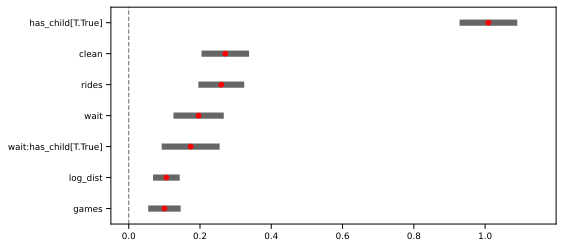

In [67]:
chapter6.plot_confidence_intervals(m7.params[1:], m7.conf_int().iloc[1:],
                       zero_line=True)